![GBC logo](https://upload.wikimedia.org/wikipedia/commons/6/69/George_Brown_College_logo.svg)
# ***BUS4023_Group_ 6: Case Study 2***

**Author:**
1. Chang, Kuan-Wen,
2. Lee, Timothy
3. Mehta, Jinal Hitesh
4. Perez Hernandez, Karla Paola
5. Poon, Siu Sang
6. Vieira Ruivo, Amanda
7. Zheng, Zhao


**Date:** November 29, 2024  
**Institution:** George Brown College

---

**Table of Contents**

0. Executive Summary
1. Business Problem
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Clustering Analysis
5. Cluster Evaluation
6. Application and Insights

**Executive Summary**

The objective of this analysis is to optimize product divisions for a retail company by identifying purchasing patterns using customer data. The dataset contains information on different product divisions purchased by customers, and our goal is to perform clustering to group customers based on their purchasing behavior. By analyzing and visualizing these clusters, we aim to provide actionable recommendations to improve business performance and enhance customer experience. The analysis provides an in-depth understanding of customer purchasing behavior and identifies distinct customer segments that can be targeted with specific strategies to maximize profit.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cat_df = pd.read_csv(R'C:\Users\s9018\Downloads\CatalogCrossSell.csv')

In [4]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Customer Number                4998 non-null   int64
 1   Clothing Division              4998 non-null   int64
 2   Housewares Division            4998 non-null   int64
 3   Health Products Division       4998 non-null   int64
 4   Automotive Division            4998 non-null   int64
 5   Personal Electronics Division  4998 non-null   int64
 6   Computers Division             4998 non-null   int64
 7   Garden Division                4998 non-null   int64
 8   Novelty Gift Division          4998 non-null   int64
 9   Jewelry Division               4998 non-null   int64
dtypes: int64(10)
memory usage: 390.6 KB


### 1)  Business Problem

Business Problem: Product Division Optimization

Objective:
To analyze customer purchase patterns to identify underperforming or overperforming product divisions and suggest changes to the product division.

### 2)	Data Preprocessing

In [5]:
print("Missing values per column:\n", cat_df.isnull().sum())
#No missing values. Therefore, handling missing values is not required.

Missing values per column:
 Customer Number                  0
Clothing Division                0
Housewares Division              0
Health Products Division         0
Automotive Division              0
Personal Electronics Division    0
Computers Division               0
Garden Division                  0
Novelty Gift Division            0
Jewelry Division                 0
dtype: int64


In [6]:
# There are no outliers as the data is binary, they are already in the same range (O or 1). I would use Min-Max scaling or standardization for continous data. 

In [7]:
# Check for invalid entries
# Exclude the 'Customer Number' column and check for invalid entries
invalid_entries = cat_df.iloc[:, 1:][(cat_df .iloc[:, 1:] < 0) | (cat_df .iloc[:, 1:] > 1)].sum().sum()
print(f"Number of invalid entries: {invalid_entries}")
print(cat_df.iloc[:, 1:].nunique())

Number of invalid entries: 0.0
Clothing Division                2
Housewares Division              2
Health Products Division         1
Automotive Division              2
Personal Electronics Division    2
Computers Division               2
Garden Division                  2
Novelty Gift Division            2
Jewelry Division                 2
dtype: int64


### 3)	Exploratory Data Analysis (EDA)

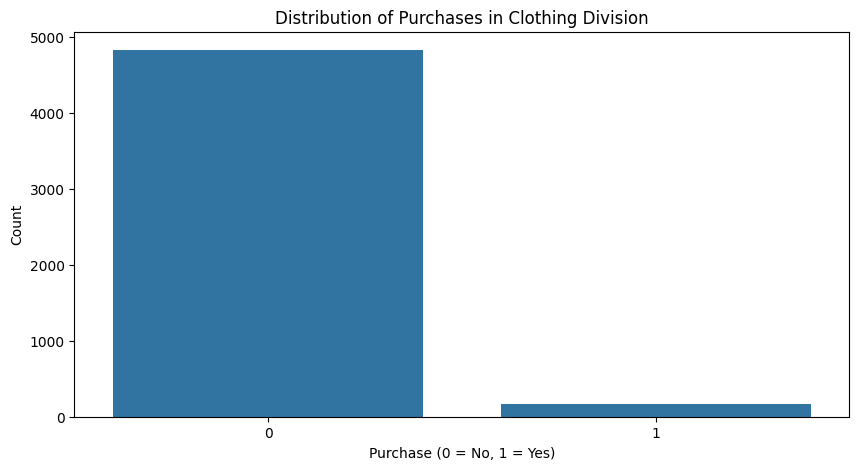

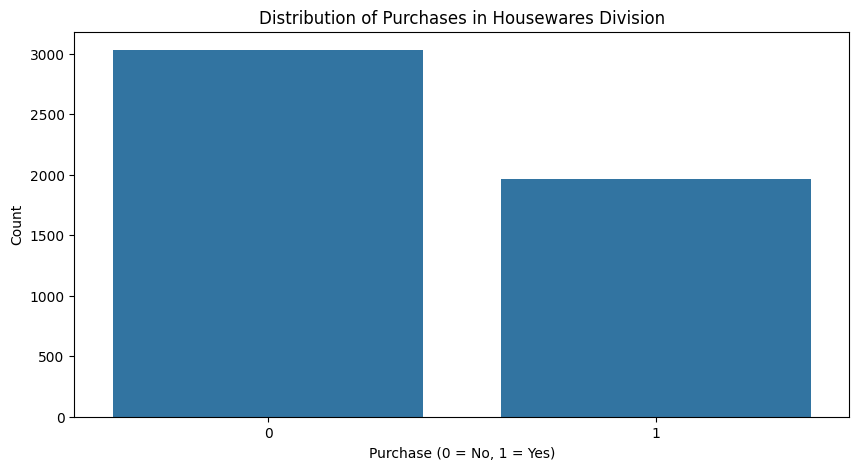

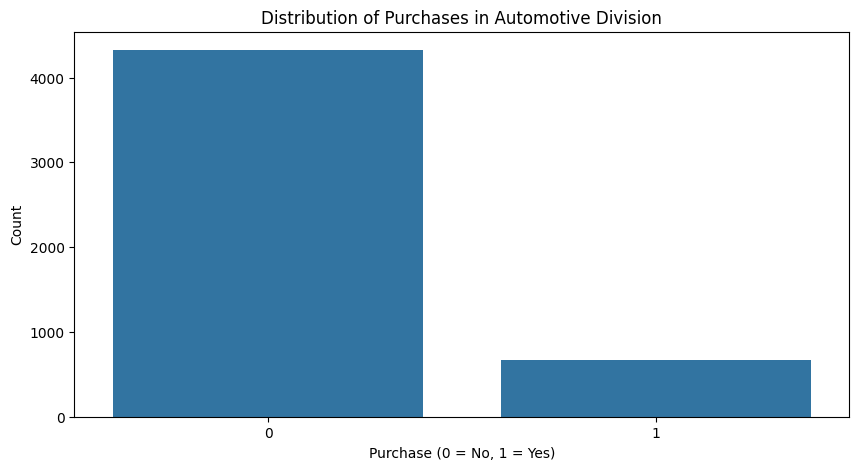

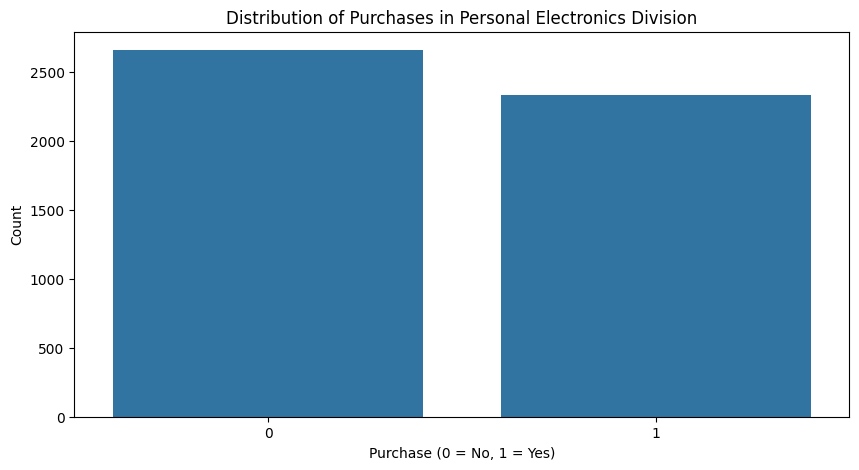

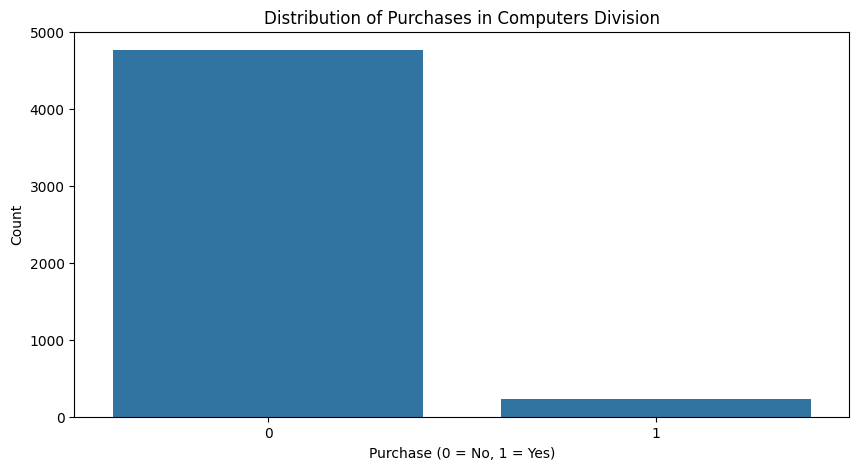

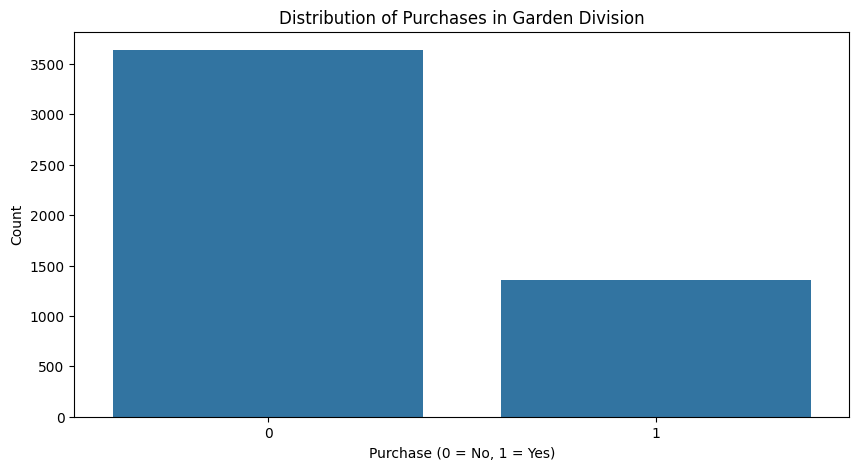

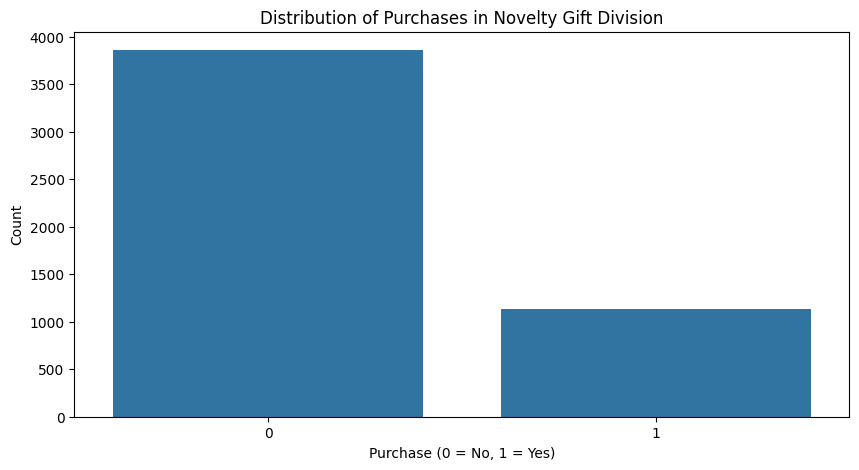

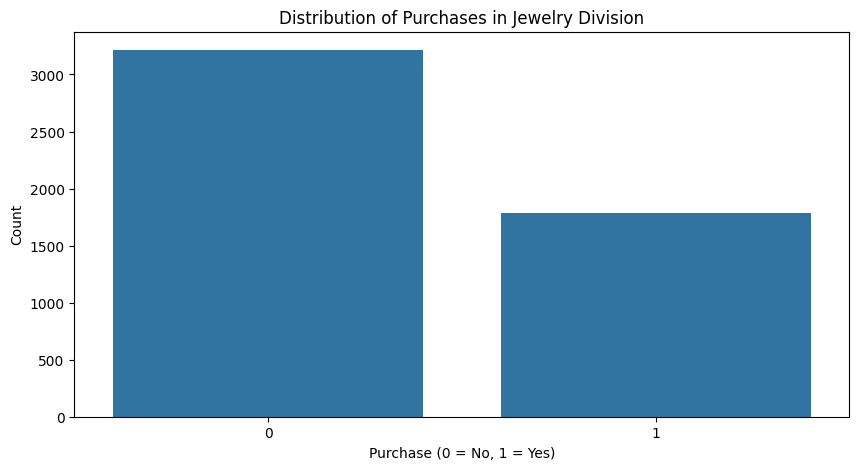

Statistical Summary:
                                count      mean       std  min  25%  50%  75%  \
Clothing Division              4998.0  0.033013  0.178689  0.0  0.0  0.0  0.0   
Housewares Division            4998.0  0.393557  0.488587  0.0  0.0  0.0  1.0   
Automotive Division            4998.0  0.134854  0.341602  0.0  0.0  0.0  0.0   
Personal Electronics Division  4998.0  0.467387  0.498985  0.0  0.0  0.0  1.0   
Computers Division             4998.0  0.046819  0.211272  0.0  0.0  0.0  0.0   
Garden Division                4998.0  0.272109  0.445090  0.0  0.0  0.0  1.0   
Novelty Gift Division          4998.0  0.227491  0.419254  0.0  0.0  0.0  0.0   
Jewelry Division               4998.0  0.356943  0.479146  0.0  0.0  0.0  1.0   

                               max  missing_values  
Clothing Division              1.0               0  
Housewares Division            1.0               0  
Automotive Division            1.0               0  
Personal Electronics Division  1.0   

In [8]:
# List of divisions to analyze
divisions = ["Clothing Division","Housewares Division",
    "Automotive Division",
    "Personal Electronics Division",
    "Computers Division",
    "Garden Division",
    "Novelty Gift Division",
    "Jewelry Division"
]

# Generate visualizations for each division
for division in divisions:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=division, data=cat_df)
    plt.title(f'Distribution of Purchases in {division}')
    plt.xlabel('Purchase (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()

# Compute statistical characteristics for each division
stats = cat_df[divisions].describe().T  # Transpose for better readability
stats['missing_values'] = cat_df[divisions].isnull().sum()  # Add missing value counts

print("Statistical Summary:")
print(stats)


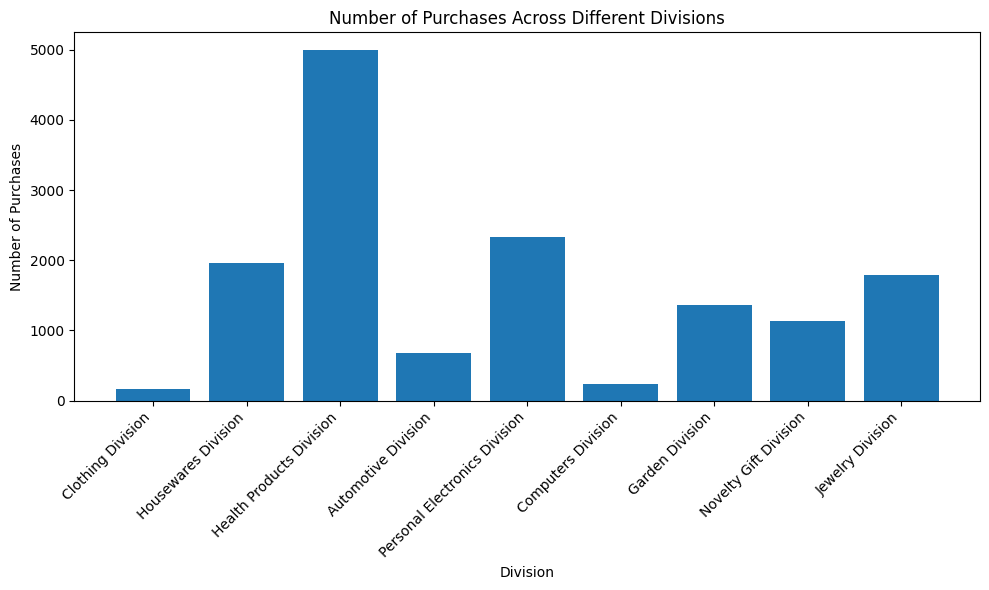

In [9]:
import matplotlib.pyplot as plt

# Extract the purchasing data (1s) across all divisions
division_columns = cat_df.columns[1:]
purchasing_counts = cat_df[division_columns].sum()

# Generate a histogram to compare the number of purchases across divisions
plt.figure(figsize=(10, 6))
plt.bar(division_columns, purchasing_counts)
plt.xlabel('Division')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases Across Different Divisions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4)Clustering + 5)Cluster Evaluation

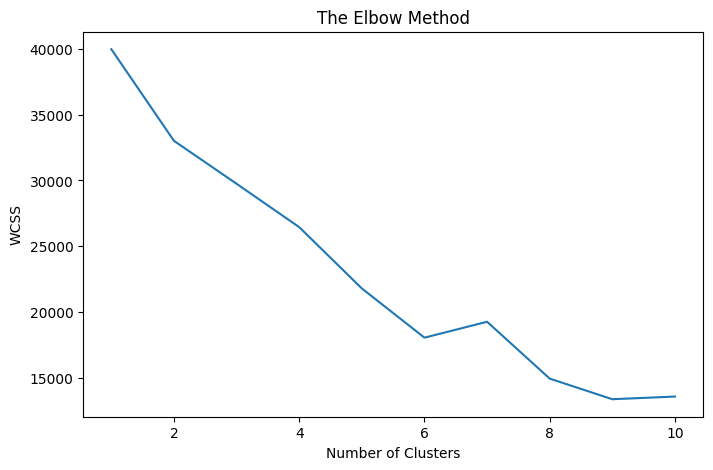

In [10]:
newcat_df = cat_df.drop(columns=['Customer Number'])

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
X = scaler.fit_transform(newcat_df)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 6)
y_kmeans = kmeans.fit_predict(X)
y_kmeans[:6]

array([2, 2, 2, 2, 4, 2])

In [12]:
X_df = pd.DataFrame(X, columns=newcat_df.columns)
X_df.head()

,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
0,-0.184771,1.241340,0.0,2.532870,1.067499,-0.221627,-0.611418,1.842764,-0.745031
1,-0.184771,1.241340,0.0,2.532870,1.067499,-0.221627,1.635543,1.842764,1.342226
2,-0.184771,1.241340,0.0,2.532870,1.067499,-0.221627,1.635543,1.842764,1.342226
3,-0.184771,-0.805581,0.0,2.532870,1.067499,-0.221627,1.635543,1.842764,-0.745031
4,-0.184771,-0.805581,0.0,-0.394809,1.067499,-0.221627,1.635543,1.842764,-0.745031


In [13]:
cluster0 = X_df.iloc[y_kmeans == 0,:]
print("Cluster 0 Summary:")
print(cluster0.describe(include='all'))

cluster1 = X_df.iloc[y_kmeans == 1,:]
print("Cluster 1 Summary:")
print(cluster1.describe(include='all'))

cluster2 = X_df.iloc[y_kmeans == 2,:]
print("Cluster 2 Summary:")
print(cluster2.describe(include='all'))

cluster3 = X_df.iloc[y_kmeans == 3,:]
print("Cluster 3 Summary:")
print(cluster3.describe(include='all'))

cluster4 = X_df.iloc[y_kmeans == 4,:]
print("Cluster 4 Summary:")
print(cluster4.describe(include='all'))

cluster5 = X_df.iloc[y_kmeans == 5,:]
print("Cluster 5 Summary:")
print(cluster5.describe(include='all'))

Cluster 0 Summary:
       Clothing Division  Housewares Division  Health Products Division  \
count       9.960000e+02           996.000000                     996.0   
mean       -1.847709e-01             0.569309                       0.0   
std         2.776952e-17             0.961716                       0.0   
min        -1.847709e-01            -0.805581                       0.0   
25%        -1.847709e-01            -0.805581                       0.0   
50%        -1.847709e-01             1.241340                       0.0   
75%        -1.847709e-01             1.241340                       0.0   
max        -1.847709e-01             1.241340                       0.0   

       Automotive Division  Personal Electronics Division  Computers Division  \
count         9.960000e+02                     996.000000          996.000000   
mean         -3.948091e-01                      -0.558453            0.225130   
std           1.110781e-16                       0.784692     

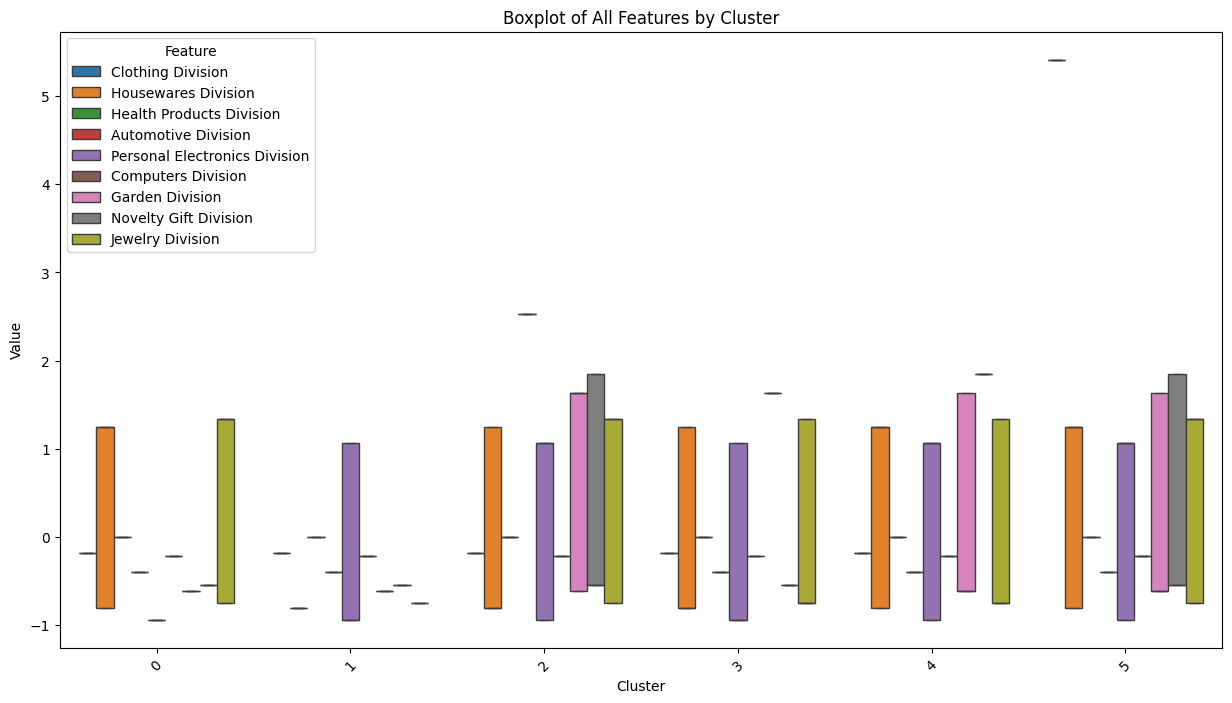

In [14]:
#Overall cluster boxplot
X_df['Cluster'] = y_kmeans

X_melted = X_df.melt(id_vars=['Cluster'], var_name='Feature', value_name='Value')

plt.figure(figsize=(15, 8))
sns.boxplot(data=X_melted, x='Cluster', y='Value', hue='Feature', showfliers=False)
plt.title('Boxplot of All Features by Cluster')
plt.xticks(rotation=45)
plt.show()

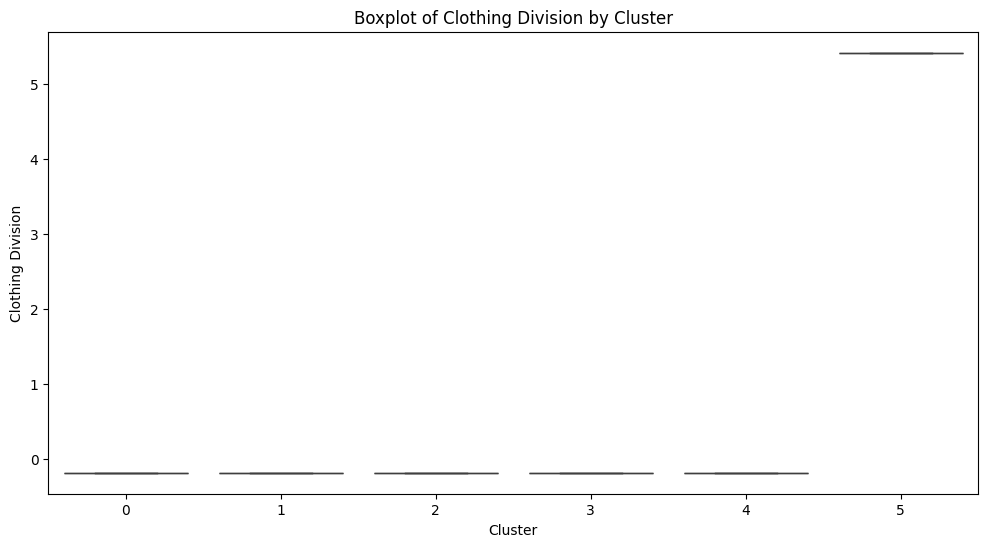

In [20]:
#For individual Division Use
X_df['Cluster'] = y_kmeans

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_df, x='Cluster', y='Clothing Division')
plt.title('Boxplot of Clothing Division by Cluster')
plt.show()

### Application and Insights

**a. What type of company/organization could this customer data pertain to?**

The customer data analyzed in this case study should belong to a retail company/ store which consists of diverse divisions providing a wide variety of conusmer goods such as clothing, electronics, automotive, garden supplies, and novelty items.

**b. Did you notice some patterns in customer behavior through your cluster analysis?**

The cluster analysis identified distinct patterns in customer purchasing behavior:

Cluster 0: Customers in this cluster showed a preference for housewares division and jewelry division , indicating a focus on lifestyle and home improvement products.

Cluster 1: Customers in this cluster exhibited higher engagement across multiple divisions, with notable interest in health products division, personal electronics division, and housewares division, suggesting these customers have diverse purchasing habits.

Cluster 2: Customers showed a strong preference for personal electronics Division.

Cluster 3: This cluster showed a low level of engagement across all divisions, indicating either a low purchasing frequency or a smaller basket size, representing occasional shoppers or those seeking specific items.

Cluster 4: Customers in this cluster had high activity in clothing division and jewelry division, highlighting preferences for lifestyle-oriented products.

Cluster 5: This cluster exhibited a strong interest in automotive division and novelty gift Division, indicating that these customers may be purchasing items for special occasions or hobbies.

**c. Based on your analysis, what are the actionable insights and recommendations you would provide to the organization?**

Targeted Marketing Campaigns: Develop targeted marketing campaigns for specific clusters. For example, customers in cluster 2 who prefer personal electronics products can be targeted with specialized offers and promotions related to new products or bundled offers in these categories.

Cross-Selling Opportunities: Identify and exploit cross-selling opportunities for cluster 1 with diverse preferences. Customers who show an affinity for health Products Division may be interested in related accessories or complementary items from the housewares Division.

Customer Loyalty Programs: Introduce loyalty programs focusing on cluster 3 with low activity. Offering incentives or personalized discounts could increase their engagement and encourage repeat purchases, transforming occasional shoppers into loyal customers.

Product-Specific Promotions: Cluster 4, with high interest in lifestyle products like jewelry and clothing, could benefit from exclusive promotions, such as early access to new collections or holiday specials, to drive further engagement and boost sales.

Tailored Communication Channels: Customize communication channels for each cluster based on their purchasing patterns. For instance, Cluster 0 customers interested in house improvement products and jewelry could be targeted through content on DIY or home improvement projects, which may drive greater brand loyalty.